In [1]:
import pandas as pd
import numpy as np

In [2]:
crime_anal_police = pd.read_csv("02. crime_in_Seoul.csv", thousands=",",encoding="euc-kr")

In [3]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [4]:
import googlemaps

In [5]:
gmaps_key = "----------------------------------------------"
gmaps = googlemaps.Client(gmaps_key)

## gmaps_key 부분은 개인 API 키입니다.

In [6]:
gmaps.geocode("서울중부경찰서",language="ko")

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

In [7]:
station_name = []

for name in crime_anal_police["관서명"]:
    station_name.append("서울"+str(name[:-1])+ "경찰서")

In [8]:
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [9]:
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    tmp = gmaps.geocode(name,language="ko")
    station_address.append(tmp[0].get("formatted_address"))
    
    tmp_loc = tmp[0].get("geometry")
    
    station_lat.append(tmp_loc["location"]["lat"])
    station_lng.append(tmp_loc["location"]["lng"])
    print(name + " --> " + tmp[0].get("formatted_address"))

서울중부경찰서 --> 대한민국 서울특별시 중구 을지로동 수표로 27
서울종로경찰서 --> 대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서 --> 대한민국 서울특별시 중구 남대문로5가 한강대로 410
서울서대문경찰서 --> 대한민국 서울특별시 서대문구 미근동 통일로 113
서울혜화경찰서 --> 대한민국 서울특별시 종로구 종로1.2.3.4가동 창경궁로 112-16
서울용산경찰서 --> 대한민국 서울특별시 용산구 원효로1가 12-12
서울성북경찰서 --> 대한민국 서울특별시 성북구 삼선동5가 301
서울동대문경찰서 --> 대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울마포경찰서 --> 대한민국 서울특별시 마포구 아현동 618-1
서울영등포경찰서 --> 대한민국 서울특별시 영등포구 영등포동 영등포로46길 14
서울성동경찰서 --> 대한민국 서울특별시 성동구 행당1동 왕십리광장로 9
서울동작경찰서 --> 대한민국 서울특별시 동작구 노량진동 72
서울광진경찰서 --> 대한민국 서울특별시 광진구 구의1동 자양로 167
서울서부경찰서 --> 대한민국 서울특별시 은평구 대조동 통일로 757
서울강북경찰서 --> 대한민국 서울특별시 강북구 번1동 오패산로 406
서울금천경찰서 --> 대한민국 서울특별시 관악구 신림동 544
서울중랑경찰서 --> 대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10
서울강남경찰서 --> 대한민국 서울특별시 강남구 대치동 998
서울관악경찰서 --> 대한민국 서울특별시 관악구 봉천동
서울강서경찰서 --> 대한민국 서울특별시 양천구 신월동 화곡로 73
서울강동경찰서 --> 대한민국 서울특별시 강동구 성내1동 성내로 57
서울종암경찰서 --> 대한민국 서울특별시 성북구 종암동 종암로 135
서울구로경찰서 --> 대한민국 서울특별시 구로구 가마산로 235
서울서초경찰서 --> 대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서 --> 대한민국 서울특별시 양천구 신정6동 목동동로 99
서울송파

In [10]:
station_address

['대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 남대문로5가 한강대로 410',
 '대한민국 서울특별시 서대문구 미근동 통일로 113',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 원효로1가 12-12',
 '대한민국 서울특별시 성북구 삼선동5가 301',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 마포구 아현동 618-1',
 '대한민국 서울특별시 영등포구 영등포동 영등포로46길 14',
 '대한민국 서울특별시 성동구 행당1동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진동 72',
 '대한민국 서울특별시 광진구 구의1동 자양로 167',
 '대한민국 서울특별시 은평구 대조동 통일로 757',
 '대한민국 서울특별시 강북구 번1동 오패산로 406',
 '대한민국 서울특별시 관악구 신림동 544',
 '대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10',
 '대한민국 서울특별시 강남구 대치동 998',
 '대한민국 서울특별시 관악구 봉천동',
 '대한민국 서울특별시 양천구 신월동 화곡로 73',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 구로구 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 송파구 가락본동 9',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 방배동 동작대로 204',
 '대한민국 서울특별시 은평구 불광2동 연서로 365',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 강남구 개포동 개포로 617']

In [11]:
station_lat

[37.5636465,
 37.5755578,
 37.5547584,
 37.5647848,
 37.5718401,
 37.5411211,
 37.5897271,
 37.58506149999999,
 37.550814,
 37.5179839,
 37.5617309,
 37.5130685,
 37.542873,
 37.6128611,
 37.63730390000001,
 37.4814051,
 37.618692,
 37.5094352,
 37.4743789,
 37.5397827,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5165667,
 37.5019065,
 37.6423605,
 37.4945959,
 37.6283597,
 37.6533589,
 37.49349]

In [12]:
station_lng

[126.9895796,
 126.9848674,
 126.9734981,
 126.9667762,
 126.9988562,
 126.9676935,
 127.0161318,
 127.0457679,
 126.954028,
 126.9075056,
 127.0363806,
 126.9428078,
 127.083821,
 126.9274951,
 127.0273399,
 126.9099508,
 127.1047136,
 127.0669578,
 126.9509748,
 126.8299968,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656763,
 127.1271513,
 127.0714027,
 126.9831279,
 126.9287226,
 127.052682,
 127.0772119]

In [13]:
gu_name = []

for name in station_address:
    tmp = name.split()
    
    tmp_gu = [gu for gu in tmp if gu[-1]=="구"][0]
    
    gu_name.append(tmp_gu)
    
crime_anal_police["구별"] = gu_name

In [14]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [15]:
crime_anal_police[crime_anal_police["관서명"]=="금천서"]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,관악구


# 금천서의 소속을 관악구에서 금천구로 변경하기

In [16]:
crime_anal_police.loc[crime_anal_police["관서명"]=="금천서",["구별"]] = "금천구"
crime_anal_police[crime_anal_police["관서명"]=="금천서"]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [17]:
crime_anal_police.to_csv("02. crime_in_Seoul_include_gu_name.csv")

In [18]:
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구
6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구


In [19]:
crime_anal_raw = pd.read_csv("02. crime_in_Seoul_include_gu_name.csv",encoding="utf-8")

In [20]:
crime_anal_raw

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구
5,5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구
6,6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구
7,7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구
8,8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구
9,9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구


In [21]:
crime_anal_raw = pd.read_csv("02. crime_in_Seoul_include_gu_name.csv",encoding="utf-8",index_col=0)

In [22]:
crime_anal = pd.pivot_table(crime_anal_raw, index="구별", aggfunc=np.sum)

In [23]:
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625


In [24]:
crime_anal["강간검거율"] = crime_anal["강간 검거"] / crime_anal["강간 발생"] * 100
crime_anal["강도검거율"] = crime_anal["강도 검거"] / crime_anal["강도 발생"] * 100
crime_anal["살인검거율"] = crime_anal["살인 검거"] / crime_anal["살인 발생"] * 100
crime_anal["절도검거율"] = crime_anal["절도 검거"] / crime_anal["절도 발생"] * 100
crime_anal["폭력검거율"] = crime_anal["폭력 검거"] / crime_anal["폭력 발생"] * 100

del crime_anal["강간 검거"]
del crime_anal["강도 검거"]
del crime_anal["살인 검거"]
del crime_anal["절도 검거"]
del crime_anal["폭력 검거"]

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [25]:
crime_anal.columns[5:]

Index(['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율'], dtype='object')

In [26]:
for column in crime_anal.columns[5:]:
    crime_anal.loc[crime_anal[column]> 100, column] = 100

In [27]:
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [28]:
crime_anal.rename(columns = {"강간 발생" : "강간", "강도 발생": "강도", "살인 발생": "살인", "절도 발생" : "절도", "폭력 발생":"폭력"},inplace=True)

In [29]:
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [30]:
from sklearn import preprocessing

In [31]:
col = crime_anal.columns[:5]

In [32]:
col

Index(['강간', '강도', '살인', '절도', '폭력'], dtype='object')

In [33]:
x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

In [34]:
x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled,columns=col, index = crime_anal.index)

In [35]:
col2 = crime_anal.columns[5:]
crime_anal_norm[col2] = crime_anal[col2]

In [36]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [37]:
result_CCTV = pd.read_csv("../Chapter1/01. CCTV_result.csv",encoding="utf-8",index_col='구별')

In [38]:
result_CCTV

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941,0.586713,1561.929921
강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575,0.231095,541.597345
강북구,831,125.203252,326063,322385,3678,57401,1.128003,17.604267,0.254859,600.298704
강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404,0.150087,824.785298
관악구,2109,149.290780,521960,504048,17912,71317,3.431681,13.663308,0.404054,465.368835
광진구,878,53.228621,370519,355748,14771,44806,3.986570,12.092767,0.236965,601.484495
구로구,1884,64.973730,440305,407235,33070,60564,7.510703,13.755011,0.427885,328.874565
금천구,1348,100.000000,252752,233263,19489,34945,7.710720,13.825806,0.533329,3.837022
노원구,1566,188.929889,553177,549365,3812,75741,0.689110,13.692001,0.283092,111.467224


In [39]:
crime_anal_norm[["인구수","CCTV"]] = result_CCTV[["인구수","소계"]]

In [40]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,551888,3238
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,437050,1010
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,326063,831
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,521960,2109
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,370519,878


In [41]:
col = crime_anal_norm.columns[:5]

In [42]:
crime_anal_norm["범죄"] = np.sum(crime_anal_norm[col], axis = 1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,551888,3238,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,437050,1010,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,326063,831,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,521960,2109,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,370519,878,2.034438


In [43]:
col = crime_anal_norm.columns[5:10]
crime_anal_norm["검거"] = np.sum(crime_anal_norm[col], axis = 1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,551888,3238,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,437050,1010,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,326063,831,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,521960,2109,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,370519,878,2.034438,416.915211


# Seaborn -> 좀 더 편리한 시각화 도구

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
import seaborn as sns

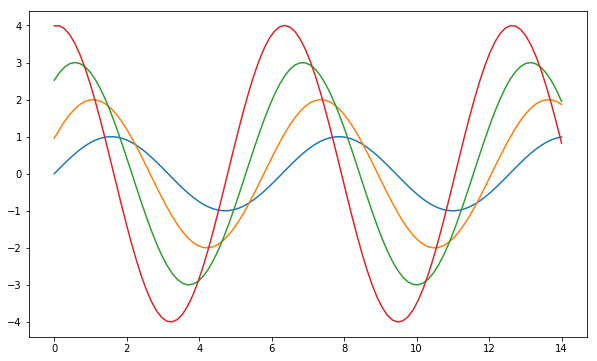

In [46]:
x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2 * np.sin(x+0.5)
y3 = 3 * np.sin(x+1.0)
y4 = 4 * np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

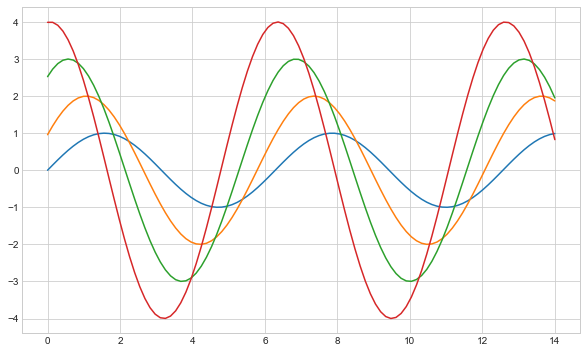

In [47]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

In [48]:
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\alsrn\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


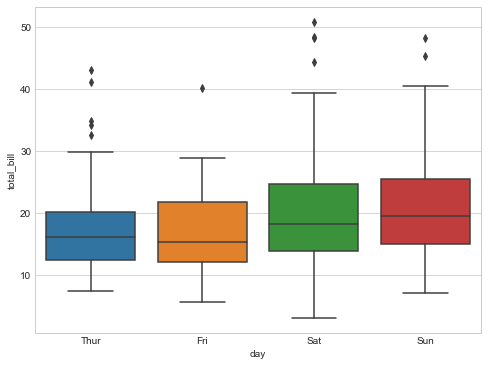

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day",y="total_bill",data=tips)
plt.show()

C:\Users\alsrn\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


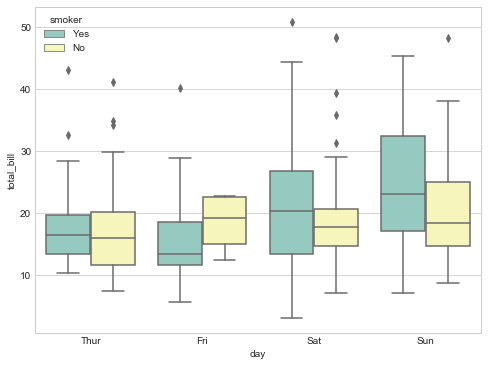

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day",y="total_bill", hue="smoker",data=tips,palette="Set3")
plt.show()

C:\Users\alsrn\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


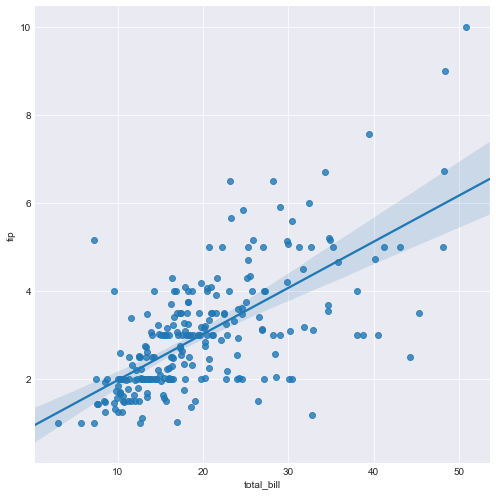

In [51]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill",y="tip",data=tips,size=7)
plt.show()

C:\Users\alsrn\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


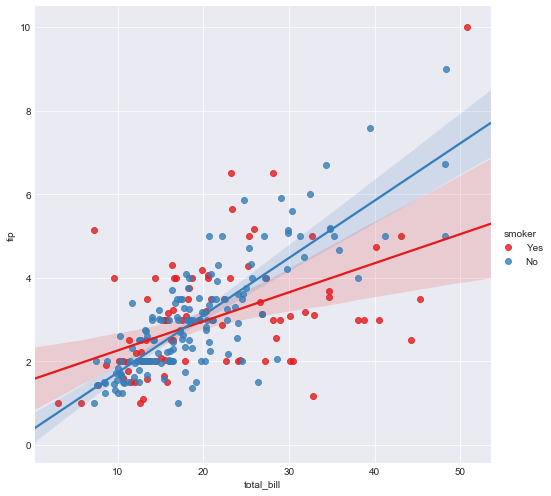

In [52]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=tips,palette="Set1",size=7)
plt.show()

In [53]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [54]:
flights = flights.pivot("month","year","passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


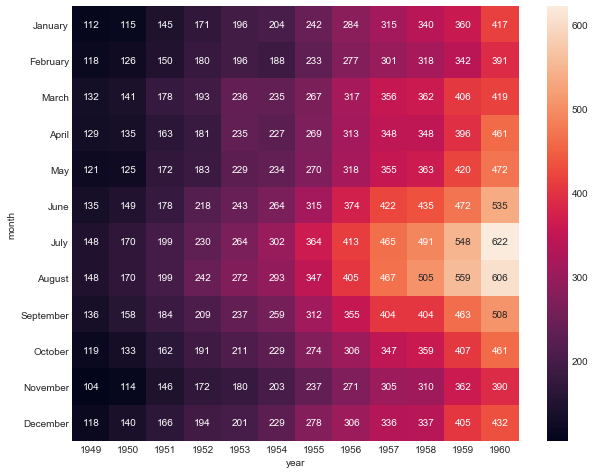

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt="d")
plt.show()

## heatmap 이라는 도구를 사용하면 이런 종류의 데이터에서 경향성을 보여주기에 편리하다.

In [56]:
sns.set(style="ticks")
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


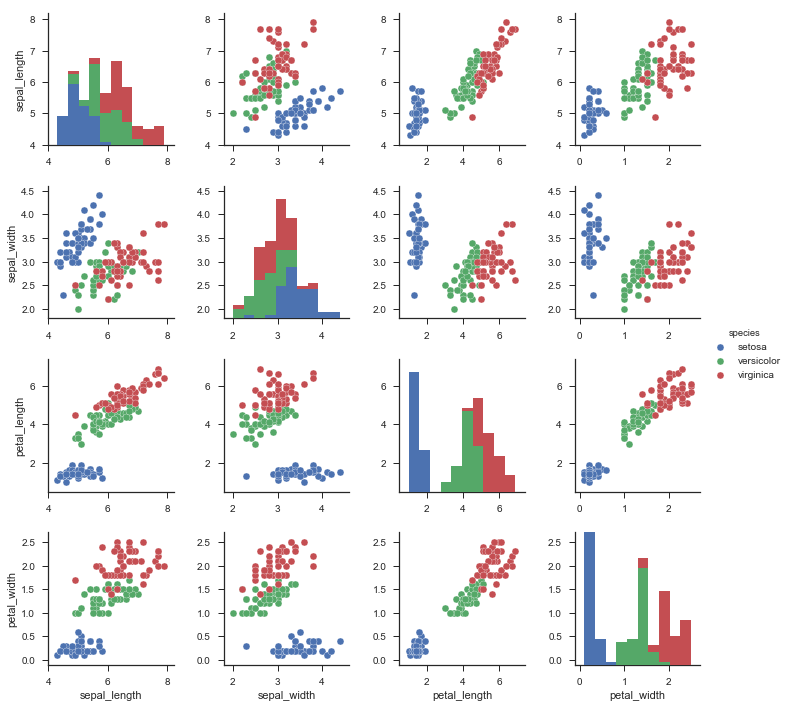

In [57]:
sns.pairplot(iris, hue="species")
plt.show()

# 범죄 데이터 시각화 시작해보기

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform
path ="c:\Windows\Fonts\malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin" :
    rc("font", family="AppleGothic")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
    
else:
    print("fail")

C:\Users\alsrn\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


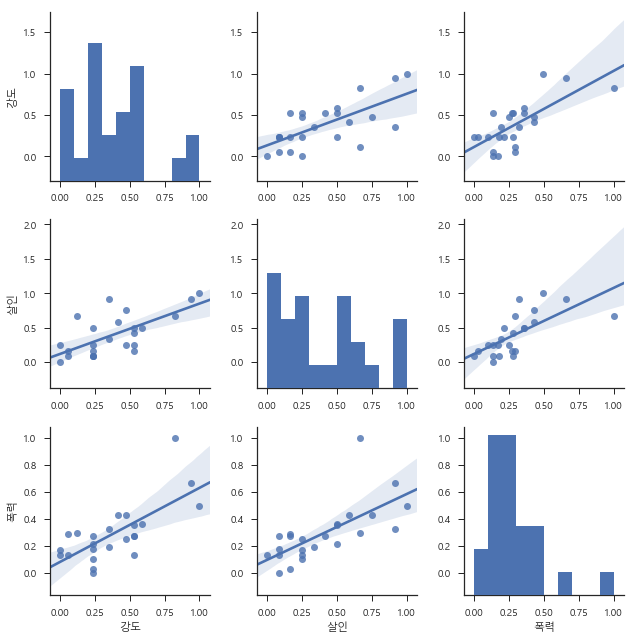

In [59]:
sns.pairplot(crime_anal_norm, vars=["강도","살인","폭력"], kind="reg",size = 3)

plt.show()

C:\Users\alsrn\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


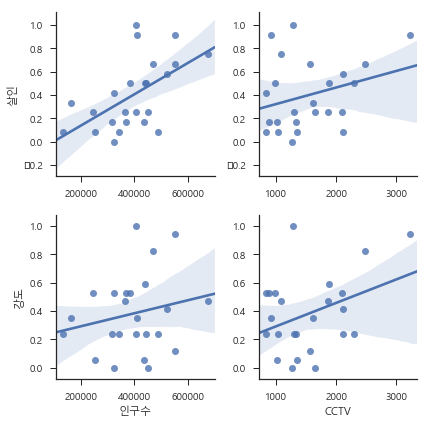

In [60]:
sns.pairplot(crime_anal_norm, x_vars=["인구수","CCTV"],y_vars=["살인","강도"], kind="reg", size=3)
plt.show()

C:\Users\alsrn\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


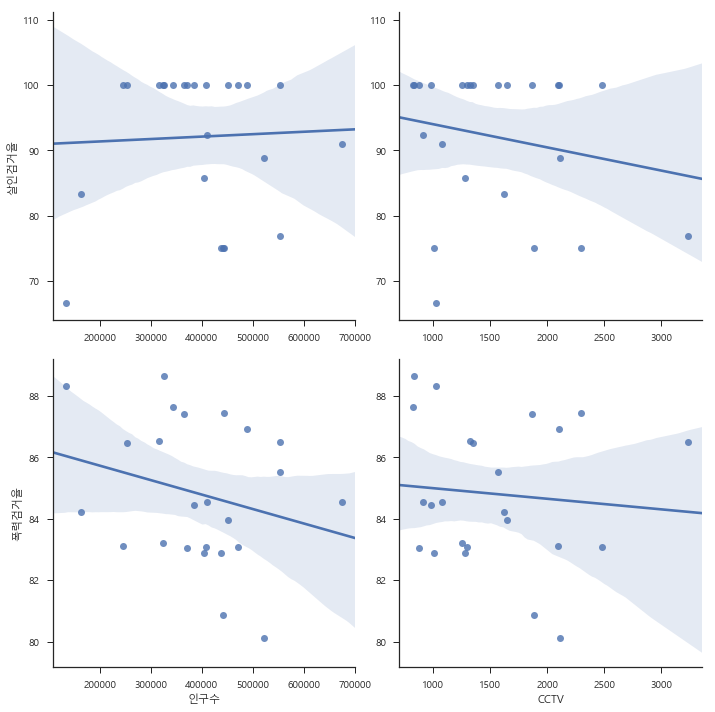

In [61]:
sns.pairplot(crime_anal_norm, x_vars=["인구수","CCTV"],y_vars=["살인검거율","폭력검거율"], kind="reg", size=5)
plt.show()

In [62]:
tmp_max = crime_anal_norm["검거"].max()
crime_anal_norm["검거"] = crime_anal_norm["검거"] / tmp_max * 100

crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거",ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,344096,825,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,252752,1348,0.589867,97.997139
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,370519,878,2.034438,96.375820
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,364527,1870,1.490147,95.444250
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,245245,2096,1.346674,94.776790


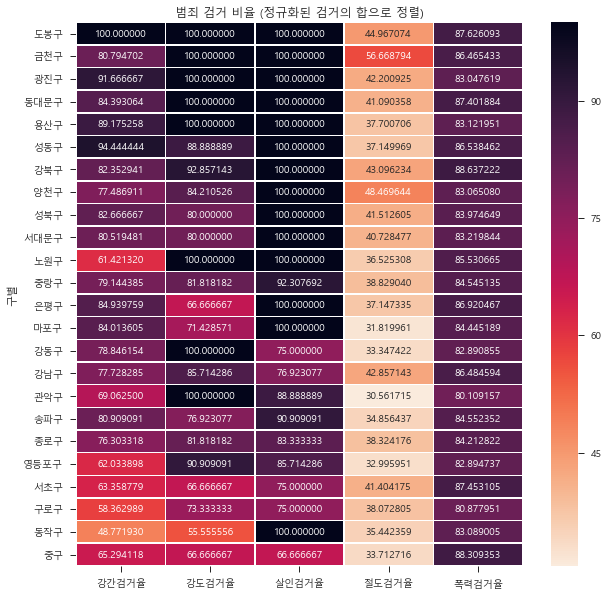

In [63]:
target_col = crime_anal_norm_sort.columns[5:10]
crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거",ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt="f", linewidths=.5,cmap = sns.cm.rocket_r)
plt.title("범죄 검거 비율 (정규화된 검거의 합으로 정렬)")
plt.show()

In [64]:
target_col = ['강간',"강도","살인","절도","폭력","범죄"]

crime_anal_norm["범죄"] = crime_anal_norm["범죄"] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄",ascending=False)



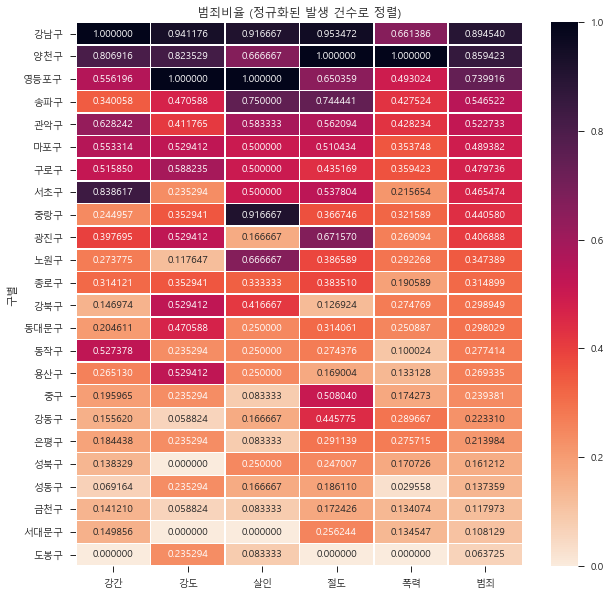

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col],annot=True, fmt="f",linewidths=.5 ,cmap = sns.cm.rocket_r)
plt.title("범죄비율 (정규화된 발생 건수로 정렬)")
plt.show()


# 지도 시각화 도구 - Folium

In [66]:
import folium

In [67]:
map_osm = folium.Map(location=[45.5236,-122.6750])

In [68]:
map_osm

In [69]:
stamen = folium.Map(location=[45.5236,-122.6750], zoom_start=13)
stamen

In [70]:
stamen = folium.Map(location=[45.5236, -122.6750], tiles= "stamen Toner", zoom_start=13)
stamen

In [71]:
map2 = stamen = folium.Map(location=[45.5236,-122.6750], tiles="stamen Toner",zoom_start=13)

folium.Marker([45.5244,-122.6699], popup="The Waterfront").add_to(map2)

folium.CircleMarker([45.5215,-122.6261], radius=50,popup="Laurelhurst Park", color="#3186cc",fill_color="#3186cc",).add_to(map2)

map2

In [72]:
state_unemployment = "02. folium_US_Unemployment_Oct2012.csv"

state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [73]:
state_geo = "02. folium_us-states.json"

map = folium.Map(location=[40, -98], zoom_start = 4)
map.choropleth(geo_data = state_geo, data=state_data,
             columns=["State", "Unemployment"],
              key_on="feature.id",
              fill_color = "YlGn",
              legend_name="Unemployment Rate (%)"
             )

In [74]:
map

# 이제! 서울시 범죄율에 대한 지도 시각화 해보자 !

- 대한민국 지도에 대한 json파일 다운로드하기
- [Luct Park](https://github.com/southkorea/southkorea-maps)

In [75]:
import json

geo_path = "02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [76]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,tiles="Stamen Toner")
map.choropleth(geo_data = geo_str,data = crime_anal_norm["살인"],columns=[crime_anal_norm.index, crime_anal_norm["살인"]],fill_color ="PuRd",key_on="feature.id")
            

In [77]:
map

In [78]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,tiles="Stamen Toner")
map.choropleth(geo_data = geo_str,data = crime_anal_norm["강간"],columns=[crime_anal_norm.index, crime_anal_norm["강간"]],fill_color ="PuRd",key_on="feature.id")
            

In [79]:
map

In [80]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,tiles="Stamen Toner")
map.choropleth(geo_data = geo_str,data = crime_anal_norm["범죄"],columns=[crime_anal_norm.index, crime_anal_norm["범죄"]],fill_color ="PuRd",key_on="feature.id")
            

In [81]:
map

In [82]:
tmp_criminal = crime_anal_norm["살인"] / crime_anal_norm["인구수"] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start = 11, tiles="Stamen Toner")

map.choropleth(geo_data = geo_str,data=tmp_criminal, columns = [crime_anal.index, tmp_criminal],fill_color="PuRd",key_on="feature.id")

map

In [83]:
crime_anal_raw["lat"] = station_lat
crime_anal_raw["lng"] = station_lng

col = ["살인 검거", "강도 검거", "강간 검거", "절도 검거", "폭력 검거"]
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()

crime_anal_raw["검거"] = np.sum(tmp, axis=1)

crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575558,126.984867,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564785,126.966776,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571840,126.998856,1.198382


In [84]:
map = folium.Map(location=[37.5502,126.982], zoom_start = 11)

for n in crime_anal_raw.index:
    folium.Marker([crime_anal_raw["lat"][n],crime_anal_raw["lng"][n]]).add_to(map)
    
map

In [85]:
map = folium.Map(location=[37.5502, 126.982],zoom_start=11)

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw["lat"][n],crime_anal_raw["lng"][n]], radius= crime_anal_raw["검거"][n]*10,color="#3186cc",fill_color="#3186cc").add_to(map)
    
map

In [86]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data = geo_str,data = crime_anal_norm["범죄"],columns=[crime_anal_norm.index, crime_anal_norm["범죄"]],fill_color ="PuRd",key_on="feature.id")
for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw["lat"][n],crime_anal_raw["lng"][n]], radius= crime_anal_raw["검거"][n]*10,color="#3186cc",fill_color="#3186cc").add_to(map)
    

map